General Purpose

Multidimensional scaling (MDS) can be considered to be an alternative to factor analysis (see Factor Analysis). In general, the goal of the analysis is to detect meaningful underlying dimensions that allow the researcher to explain observed similarities or dissimilarities (distances) between the investigated objects. In factor analysis, the similarities between objects (e.g., variables) are expressed in the correlation matrix. With MDS, you can analyze any kind of similarity or dissimilarity matrix, in addition to correlation matrices.

In [67]:
from __future__ import division
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from pandas import DataFrame
from matplotlib.collections import LineCollection
from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA


%matplotlib inline

def desenhaVizinhos3D(M):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    n = len(M)
    cor = ['red', 'blue', 'green', 'black', 'pink', 'orange', 'yellow', 'brown', 'gray', 'cyan']
    cont = 0
    for i in range(n):
        xs = M[i,0]
        ys = M[i,1]
        zs = M[i,2]
        ax.scatter(xs, ys, zs, color =numpy.random.rand(3,1), marker='o')
        cont = cont + 1
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.show()
    
def desenhaVizinhos3DComNome(M, name):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    n = len(M)
    cor = ['red', 'blue', 'green', 'black', 'pink', 'orange', 'yellow', 'brown', 'gray', 'cyan']
    cont = 0
    for i in range(n):
        xs = M[i,0]
        ys = M[i,1]
        zs = M[i,2]
        ax.scatter(xs, ys, zs, color = cor[cont], marker='o')
        cont = cont + 1
    ax.legend(name, scatterpoints=1, loc='lower left', ncol=4, fontsize=8)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.show()
def desenhaVizinhosComNome(M, name):
    n = len(M)
    x_min = np.amin(M)*1.5
    x_max = np.amax(M)*1.5
    cor = ['red', 'blue', 'green', 'black', 'pink', 'orange', 'yellow', 'brown', 'gray', 'cyan']
    cont = 0
    for i in range(n):
        plt.scatter(M[i,0], M[i,1], color = cor[cont])
        cont = cont + 1
    plt.xlim(x_min,x_max)
    plt.ylim(x_min,x_max)
    plt.legend(name, scatterpoints=1, loc='lower left', ncol=4, fontsize=8)
    plt.grid()
  
    plt.show()
    
def desenhaVizinhosComNomeELinhas(similarities, pos, name):
    n = len(pos)
    fig, ax = plt.subplots()
    cor = ['red', 'blue', 'green', 'black', 'pink', 'orange', 'yellow', 'brown', 'gray', 'cyan']
    cont = 0
    for i in range(n):
        plt.scatter(pos[i,0], pos[i,1], color = cor[cont])
        cont = cont + 1
    plt.legend(name, scatterpoints=1, loc='lower left', ncol=4, fontsize=8)
    ax.grid()
    x = pos[:, 0]
    y = pos[:, 1]
    x_min = min(x)
    y_min = min(y)
    x_max = max(x)
    y_max = max(y)
    plt.xlim(x_min*1.3,x_max*1.3)
    plt.ylim(y_min*1.3,y_max*1.3)
    lc = LineCollection([list(zip(x, y)) for ys in y],
                               linewidths=1.5,
                               linestyles='solid')
    lc.set_array(pos[0,:].flatten())
    lc.set_linewidths(0.2)
    ax.add_collection(lc)
    plt.show()
    
def desenhaVizinhosComLinhas(similarities, pos):
    n = len(pos)
    fig, ax = plt.subplots()
    cor = ['red', 'blue', 'green', 'black', 'pink', 'orange', 'yellow', 'brown', 'gray', 'cyan']
    cont = 0
    for i in range(n):
        plt.scatter(pos[i,0], pos[i,1], color = np.random.rand(3,1))
        cont = cont + 1
    ax.grid()
    x = pos[:, 0]
    y = pos[:, 1]
    lc = LineCollection([list(zip(x, y)) for ys in y],
                               linewidths=0.5,
                               linestyles='solid')
    lc.set_array(pos[0,:].flatten())
    lc.set_linewidths(0.1)
    ax.add_collection(lc)
    plt.show()
    
def desenhaVizinhos(M):
    n = len(M)
    x_min = np.amin(M)*1.2
    x_max = np.amax(M)*1.2
    #cor = ['red', 'blue', 'green', 'black', 'pink', 'orange', 'yellow', 'brown', 'gray', 'cyan']
    cor_lst = []
    for i in range(n):
        cor = np.random.rand(3,1)
        cor_lst.append(cor)
        plt.scatter(M[i,0], M[i,1], color = cor)
    plt.xlim(x_min,x_max)
    plt.ylim(x_min,x_max)
    #plt.legend(cor_lst, scatterpoints=1, loc='lower left', ncol=4, fontsize=8)
    plt.grid()
    plt.show()
    
def toDataFrame(M, name):
    df = pd.DataFrame(M, columns = name, index = name)
    return df

def distancia(x0, y0, x1, y1):
    return np.sqrt((x0-x1)**2 + (y0 + y1)**2)

def elevaQuadrado(D):
    n = len(D)
    D2 = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            D2[i,j] = D[i,j]*D[i,j]
    return D2

def Strain(B, X):
    numerador = 0
    denominador = 0
    n = len(D)
    for i in range(n):
        for j in range(n):
            numerador = numerador + (B[i,j] - np.inner(X[i],X[j]))**2
            denominador = denominador + D[i,j]**2
    return np.sqrt(numerador/denominador)

def Stress(D,B):
    numerador = 0
    denominador = 0
    n = len(D)
    for i in range(n):
        for j in range(n):
            numerador = numerador + (D[i,j] - np.linalg.norm(B[i,:] - B[j,:]))**2
            denominador = denominador + D[i,j]**2
    return np.sqrt(numerador/denominador)                               
                                     
def my_mds(D):                                                                      
    n = len(D)                                                                      
    H = np.eye(n) - np.ones((n, n))*0.25

    # D[i][j] = D[i][j]^2
    D2 = elevaQuadrado(D)
    
    B = -H.dot(D2).dot(H)/2
 
    # autovetored para diagonalizar                                                                            
    evals, evecs = np.linalg.eig(B)
    
    # Ordeno os autovalores e autovetores                                                  
    idx   = np.argsort(evals)[::-1]
    evals = evals[idx]
    evecs = evecs[:,idx]
 
    # Pego os maiores autovalores positivos
    w, = np.where(evals > 0)
    
    L  = np.diag(np.sqrt(evals[w]))
    
    V  = evecs[:,w]

    Y  = V.dot(L)
    stress = Stress(D, B)
    return Y, evals, stress

In [68]:
D = np.matrix([[0., 434.4, 584.5, 943.3],[434.4, 0., 439.4, 521.3],[584.5, 439.4, 0., 522.2], [943.3, 521.3, 522.2, 0.]])
name = ['Sao Paulo', 'Rio De Janeiro', 'Belo Horizonte', 'Vitoria']
df_D = toDataFrame(D, name)
df_D

,Sao Paulo,Rio De Janeiro,Belo Horizonte,Vitoria
Sao Paulo,0.0,434.4,584.5,943.3
Rio De Janeiro,434.4,0.0,439.4,521.3
Belo Horizonte,584.5,439.4,0.0,522.2
Vitoria,943.3,521.3,522.2,0.0


In [69]:
Y, autovetores, stress = my_mds(D)
df_Y = pd.DataFrame(Y, index = name)
print autovetores
print 'Var Stress:', stress/np.max(D)
df_Y

[  4.49004575e+05   9.97676846e+04  -2.54622207e-11  -9.35291187e+03]
Stress: 0.662988285703


,0,1
Sao Paulo,471.409054,17.732651
Rio De Janeiro,50.496666,173.539328
Belo Horizonte,-51.148934,-255.393391
Vitoria,-470.756786,64.121411


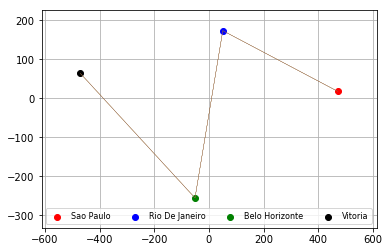

In [70]:
desenhaVizinhosComNomeELinhas(D, Y, name)

6.31235340297


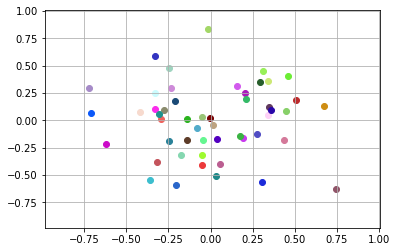

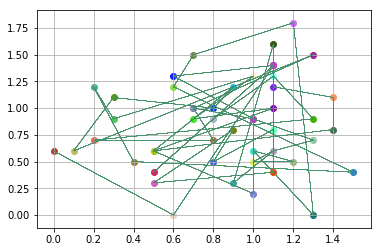

In [71]:
def random_matrix_s(n, max_num):
    M = np.random.randint(0, max_num, size=(n,n))
    M_S = (M + M.T)/max_num
    for i in range(n):
        M_S[i,i] = 0
    return M_S
M_S = random_matrix_s(50, 10)
My_Y, e, s = my_mds(M_S)
print s
desenhaVizinhos(My_Y)
desenhaVizinhosComLinhas(My_Y, M_S)

/Users/LuisClaudio/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:53: RuntimeWarning: divide by zero encountered in true_divide


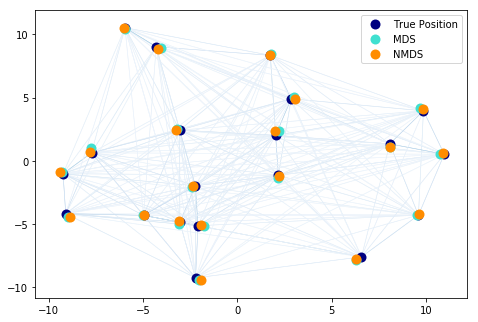

In [72]:
# Author: Nelle Varoquaux <nelle.varoquaux@gmail.com>
# License: BSD

n_samples = 20
seed = np.random.RandomState(seed=3)
X_true = seed.randint(0, 20, 2 * n_samples).astype(np.float)
X_true = X_true.reshape((n_samples, 2))


# Center the data
X_true -= X_true.mean()

#similarities
similarities = euclidean_distances(X_true)

# Add noise to the similarities
noise = np.random.rand(n_samples, n_samples)
noise = noise + noise.T
noise[np.arange(noise.shape[0]), np.arange(noise.shape[0])] = 0
similarities += noise

mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=seed,
                   dissimilarity="precomputed", n_jobs=1)
pos = mds.fit(similarities).embedding_

nmds = manifold.MDS(n_components=2, metric=False, max_iter=3000, eps=1e-12,
                    dissimilarity="precomputed", random_state=seed, n_jobs=1,
                    n_init=1)
npos = nmds.fit_transform(similarities, init=pos)

# Rescale the data
pos *= np.sqrt((X_true ** 2).sum()) / np.sqrt((pos ** 2).sum())
npos *= np.sqrt((X_true ** 2).sum()) / np.sqrt((npos ** 2).sum())

# Rotate the data
clf = PCA(n_components=2)

X_true = clf.fit_transform(X_true)

pos = clf.fit_transform(pos)

npos = clf.fit_transform(npos)

fig = plt.figure(1)
ax = plt.axes([0., 0., 1., 1.])

s = 100
plt.scatter(X_true[:, 0], X_true[:, 1], color='navy', s=s, lw=0, label='True Position')
plt.scatter(pos[:, 0], pos[:, 1], color='turquoise', s=s, lw=0, label='MDS')
plt.scatter(npos[:, 0], npos[:, 1], color='darkorange', s=s, lw=0, label='NMDS')
plt.legend(scatterpoints=1, loc='best', shadow=False)

similarities = similarities.max() / similarities * 100
similarities[np.isinf(similarities)] = 0

# Plot the edges
start_idx, end_idx = np.where(pos)
# a sequence of (*line0*, *line1*, *line2*), where::
#            linen = (x0, y0), (x1, y1), ... (xm, ym)
segments = [[X_true[i, :], X_true[j, :]]
            for i in range(len(pos)) for j in range(len(pos))]
values = np.abs(similarities)
lc = LineCollection(segments,
                    zorder=0, cmap=plt.cm.Blues,
                    norm=plt.Normalize(0, values.max()))
lc.set_array(similarities.flatten())
lc.set_linewidths(0.5 * np.ones(len(segments)))
ax.add_collection(lc)

plt.show()


 Comparison of Manifold Learning methods
  
An illustration of dimensionality reduction on the S-curve dataset
with various manifold learning methods.
  
For a discussion and comparison of these algorithms, see the
:ref:`manifold module page <manifold>`
  
For a similar example, where the methods are applied to a
sphere dataset, see :ref:`example_manifold_plot_manifold_sphere.py`
  
Note that the purpose of the MDS is to find a low-dimensional
representation of the data (here 2D) in which the distances respect well
the distances in the original high-dimensional space, unlike other
manifold-learning algorithms, it does not seeks an isotropic
representation of the data in the low-dimensional space.

standard: 0.12 sec
ltsa: 0.24 sec
hessian: 0.39 sec
modified: 0.27 sec
Isomap: 0.5 sec
MDS: 3.1 sec
SpectralEmbedding: 0.17 sec


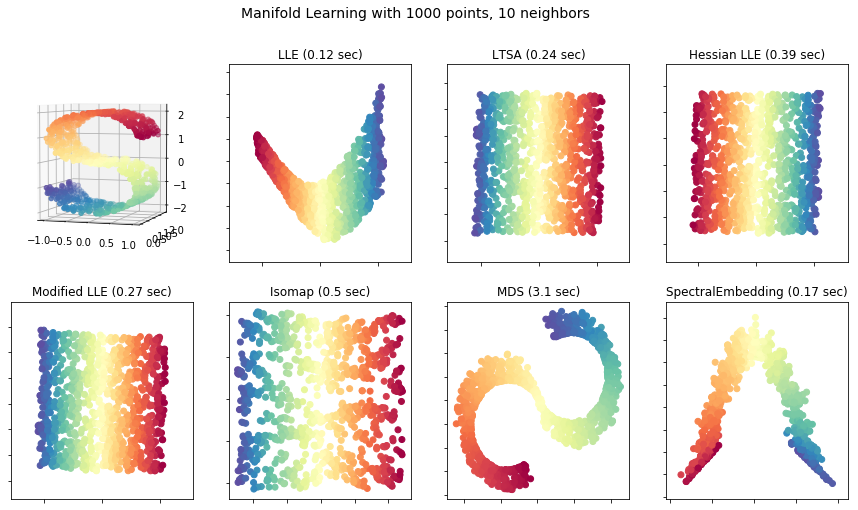

In [73]:
"""
=========================================
 Comparison of Manifold Learning methods
=========================================
  
An illustration of dimensionality reduction on the S-curve dataset
with various manifold learning methods.
  
For a discussion and comparison of these algorithms, see the
:ref:`manifold module page <manifold>`
  
For a similar example, where the methods are applied to a
sphere dataset, see :ref:`example_manifold_plot_manifold_sphere.py`
  
Note that the purpose of the MDS is to find a low-dimensional
representation of the data (here 2D) in which the distances respect well
the distances in the original high-dimensional space, unlike other
manifold-learning algorithms, it does not seeks an isotropic
representation of the data in the low-dimensional space.
"""
  
# Author: Jake Vanderplas -- <vanderplas@astro.washington.edu>
  
print(__doc__)
  
from time import time
  
import pylab as pl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
  
from sklearn import manifold, datasets
  
# Next line to silence pyflakes. This import is needed.
Axes3D
  
n_points = 1000
X, color = datasets.samples_generator.make_s_curve(n_points, random_state=0)
n_neighbors = 10
n_components = 2
  
fig = pl.figure(figsize=(15, 8))
pl.suptitle("Manifold Learning with %i points, %i neighbors"
            % (1000, n_neighbors), fontsize=14)
  
try:
    # compatibility matplotlib < 1.0
    ax = fig.add_subplot(241, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=pl.cm.Spectral)
    ax.view_init(4, -72)
except:
    ax = fig.add_subplot(241, projection='3d')
    pl.scatter(X[:, 0], X[:, 2], c=color, cmap=pl.cm.Spectral)
  
methods = ['standard', 'ltsa', 'hessian', 'modified']
labels = ['LLE', 'LTSA', 'Hessian LLE', 'Modified LLE']
  
for i, method in enumerate(methods):
    t0 = time()
    Y = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                        eigen_solver='auto',
                                        method=method).fit_transform(X)
    t1 = time()
    print("%s: %.2g sec" % (methods[i], t1 - t0))
  
    ax = fig.add_subplot(242 + i)
    pl.scatter(Y[:, 0], Y[:, 1], c=color, cmap=pl.cm.Spectral)
    pl.title("%s (%.2g sec)" % (labels[i], t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    pl.axis('tight')
  
t0 = time()
Y = manifold.Isomap(n_neighbors, n_components).fit_transform(X)
t1 = time()
print("Isomap: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(246)
pl.scatter(Y[:, 0], Y[:, 1], c=color, cmap=pl.cm.Spectral)
pl.title("Isomap (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
pl.axis('tight')
  
  
t0 = time()
mds = manifold.MDS(n_components, max_iter=100, n_init=1)
Y = mds.fit_transform(X)
t1 = time()
print("MDS: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(247)
pl.scatter(Y[:, 0], Y[:, 1], c=color, cmap=pl.cm.Spectral)
pl.title("MDS (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
pl.axis('tight')
  
  
t0 = time()
se = manifold.SpectralEmbedding(n_components=n_components,
                                n_neighbors=n_neighbors)
Y = se.fit_transform(X)
t1 = time()
print("SpectralEmbedding: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(248)
pl.scatter(Y[:, 0], Y[:, 1], c=color, cmap=pl.cm.Spectral)
pl.title("SpectralEmbedding (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
pl.axis('tight')
  
pl.show()
  